<h1>Current Plot<h1>

<h3>Import<h3>

In [2]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>Plot<h3>

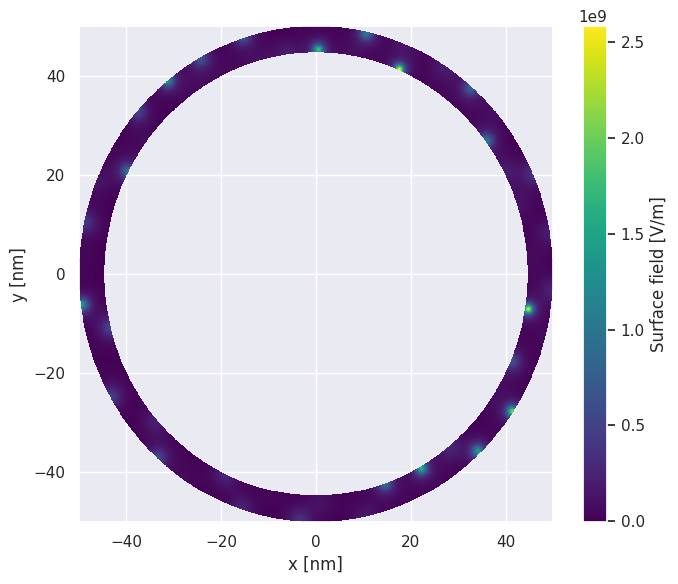

In [3]:
step1 = 2550

filename1 = f'./out/field-{step1}.bin'
field_dt1 = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('field', np.float64)])
field_mem1 = np.memmap(filename1, dtype=field_dt1, mode='r', order='F')
field_df1 = pd.DataFrame.from_records(data=field_mem1, columns=field_mem1.dtype.names)
# Assume z is constant (2D slice), so drop it or filter for a fixed z
z1 = field_df1['z'].iloc[0]  # or set z0 manually
slice_df1 = field_df1[field_df1['z'] == z1]
slice_df1['x'] *= 1e9
slice_df1['y'] *= 1e9


# plt.plot(field_df1['field'])

pivot_table1 = slice_df1.pivot(index='y', columns='x', values='field')  # Ensure x/y are regularly spaced
X1, Y1 = np.meshgrid(pivot_table1.columns.values, pivot_table1.index.values)
Z1 = pivot_table1.values

# Plot heatmap
plt.figure(figsize=(7,6))
plt.pcolormesh(X1, Y1, Z1, shading='auto', cmap='viridis', vmin=np.min(field_df1['field']), vmax=np.max(field_df1['field']))
plt.colorbar(label='Surface field [V/m]')
plt.xlabel('x [nm]')
plt.ylabel('y [nm]')

plt.tight_layout()
plt.show()



In [4]:
# filename_field = './out/laplace_grid.dt'
# df_field = pd.read_csv(filepath_or_buffer=filename_field,delim_whitespace=True, \
#                        header=None, names=['emit','x','y','z'])
# fig, ax = plt.subplots(figsize=(10, 6))
# for i in range(len(df_field['emit'])):
#     color = 'r'
#     if df_field['emit'][i] == 0: color = 'b'
#     ax.scatter(df_field['x'][i], df_field['y'][i], c=color, s=5, alpha=0.5)
# plt.show()